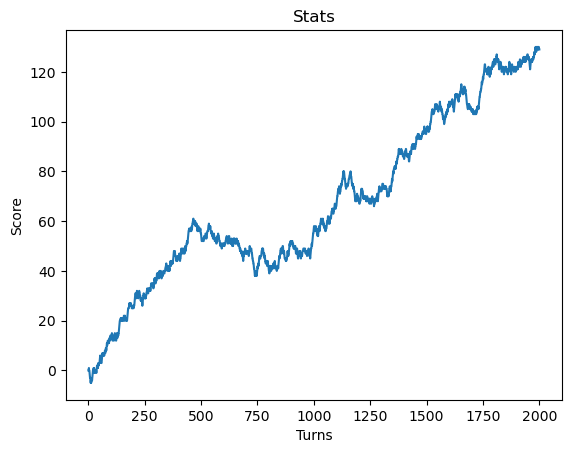

In [25]:
#Self-learning stone-paper-scissors program based on hidden Markov models

import numpy as np;
import matplotlib.pyplot as plt;

#possible moves
move = {
    0 : "rock",
    1 : "paper",
    2 : "scissors"
};

#possible results
result = {
    1 : "win",
    0 : "draw",
    -1 : "lose"
};

#nominal count of transitions between moves ([rr,rp,rs], [pr,pp,ps], [sr,sp,ss])
trans_count = np.array([[1,1,1],
                    [1,1,1],
                    [1,1,1]]);

#transition distribution: trans_dist_ij = P(X_n = j | X_n-1 = i)
trans_dist = set_trans(trans_count);

#game setup
turns = 2000;
curr_turn = 1;
score = 0;
turn_arr = [];
score_arr = [];

#nominal oponent move
prev_op_move = oponent_2()

while curr_turn<=turns:
    curr_move = np.random.choice(a=[1,2,0], replace=True, p=trans_dist[prev_op_move]);
    curr_op_move = oponent_2()
    trans_dist = upd_trans(trans_count,prev_op_move, curr_op_move );
    prev_op_move = curr_op_move;
    curr_result = check_result(curr_move, curr_op_move);
    score += curr_result;

    turn_arr.append(curr_turn);
    score_arr.append(score);
    curr_turn += 1;
    
show_plot(turn_arr, score_arr);

In [26]:
def set_trans(matrix):
    temp = np.array([0,0,0]);
    for i in range(matrix.shape[0]):
        row = [];
        for j in range(matrix.shape[1]):
            row.append(matrix[i][j]);
        temp = np.vstack((temp,get_distribution(row)));
    trans_matrix = np.delete(temp,0,0);
    
    return trans_matrix;  

In [27]:
def get_distribution(row):
    row_sum = sum(row);
    dist = [];
    for n in row:
        dist.append(n/row_sum);
    if sum(dist) != 1:
        position = np.random.choice([0,1,2])
        dist[position] -= sum(dist)-1;

    return dist;

In [28]:
def upd_trans(trans_count, x, y):
    trans_count[x][y] += 1;
    temp = set_trans(trans_count); 
    
    return temp;

In [29]:
 def check_result(move, op_move):
        if move == op_move:
            return 0;
        elif move-op_move == 1 or move-op_move == -2:
            return 1;
        else:
            return -1;

In [30]:
def oponent_1():
    return 1;

In [31]:
def oponent_2():
    return np.random.choice(a=[0,1,2], replace=True, p=[0.2, 0.5, 0.3]);

In [32]:
def show_plot(turns, score):
    plt.plot(turns,score)
    plt.title('Stats')
    plt.xlabel('Turns')
    plt.ylabel('Score')
    plt.show()